In [1]:
from jaad_data import *
import pandas as pd

In [2]:
j = JAAD(data_path=".")
train_data = j.generate_data_trajectory_sequence("train")
val_data = j.generate_data_trajectory_sequence("val")
test_data = j.generate_data_trajectory_sequence("test")

---------------------------------------------------------
Generating action sequence data
fstride: 1
sample_type: all
subset: all_videos
width_rng: [60, inf]
squarify_ratio: 0
data_split_type: default
seq_type: crossing
min_track_size: 15
random_params: {'ratios': None, 'val_data': True, 'regen_data': False}
---------------------------------------------------------
Generating database for jaad
jaad database loaded from /home/ubuntu/niviru/JAAD/data_cache/jaad_database.pkl
---------------------------------------------------------
Generating crossing data
Split: train
Number of pedestrians: 1405 
Total number of samples: 406 
---------------------------------------------------------
Generating action sequence data
fstride: 1
sample_type: all
subset: all_videos
width_rng: [60, inf]
squarify_ratio: 0
data_split_type: default
seq_type: crossing
min_track_size: 15
random_params: {'ratios': None, 'val_data': True, 'regen_data': False}
---------------------------------------------------------


In [3]:
def get_sequence_dict(data_dict):
    new_dict = {key + "_seq": [] for key in list(data_dict.keys())[:-1]}
    for i in range(len(data_dict['image'])):
        print("Getting sequence data for {}...".format("/".join(data_dict['image'][i][0].split("/")[:-1])))
        j = 0
        while (j + 14) <= len(data_dict['image'][i]):
            if not any(data_dict['occlusion'][i][j:j+14]):
                for new_key, key in zip(new_dict.keys(), data_dict.keys()):
                    new_dict[new_key].append(np.squeeze(np.array(data_dict[key][i][j:j+14])))
            j += 1
    return new_dict
                        

In [4]:
train_seq = get_sequence_dict(train_data)
val_seq = get_sequence_dict(val_data)
test_seq = get_sequence_dict(test_data)

Getting sequence data for ./images/video_0001...
Getting sequence data for ./images/video_0001...
Getting sequence data for ./images/video_0001...
Getting sequence data for ./images/video_0003...
Getting sequence data for ./images/video_0003...
Getting sequence data for ./images/video_0007...
Getting sequence data for ./images/video_0007...
Getting sequence data for ./images/video_0009...
Getting sequence data for ./images/video_0014...
Getting sequence data for ./images/video_0019...
Getting sequence data for ./images/video_0019...
Getting sequence data for ./images/video_0020...
Getting sequence data for ./images/video_0020...
Getting sequence data for ./images/video_0025...
Getting sequence data for ./images/video_0026...
Getting sequence data for ./images/video_0026...
Getting sequence data for ./images/video_0026...
Getting sequence data for ./images/video_0026...
Getting sequence data for ./images/video_0027...
Getting sequence data for ./images/video_0027...
Getting sequence dat

Getting sequence data for ./images/video_0194...
Getting sequence data for ./images/video_0194...
Getting sequence data for ./images/video_0196...
Getting sequence data for ./images/video_0198...
Getting sequence data for ./images/video_0200...
Getting sequence data for ./images/video_0200...
Getting sequence data for ./images/video_0202...
Getting sequence data for ./images/video_0204...
Getting sequence data for ./images/video_0204...
Getting sequence data for ./images/video_0204...
Getting sequence data for ./images/video_0204...
Getting sequence data for ./images/video_0208...
Getting sequence data for ./images/video_0209...
Getting sequence data for ./images/video_0210...
Getting sequence data for ./images/video_0210...
Getting sequence data for ./images/video_0215...
Getting sequence data for ./images/video_0215...
Getting sequence data for ./images/video_0215...
Getting sequence data for ./images/video_0218...
Getting sequence data for ./images/video_0218...
Getting sequence dat

Getting sequence data for ./images/video_0331...
Getting sequence data for ./images/video_0331...
Getting sequence data for ./images/video_0331...
Getting sequence data for ./images/video_0331...
Getting sequence data for ./images/video_0331...
Getting sequence data for ./images/video_0335...
Getting sequence data for ./images/video_0335...
Getting sequence data for ./images/video_0335...
Getting sequence data for ./images/video_0335...
Getting sequence data for ./images/video_0335...
Getting sequence data for ./images/video_0335...
Getting sequence data for ./images/video_0341...
Getting sequence data for ./images/video_0341...
Getting sequence data for ./images/video_0341...
Getting sequence data for ./images/video_0341...
Getting sequence data for ./images/video_0342...
Getting sequence data for ./images/video_0342...
Getting sequence data for ./images/video_0345...
Getting sequence data for ./images/video_0345...
Getting sequence data for ./images/video_0345...
Getting sequence dat

Getting sequence data for ./images/video_0135...
Getting sequence data for ./images/video_0135...
Getting sequence data for ./images/video_0135...
Getting sequence data for ./images/video_0135...
Getting sequence data for ./images/video_0135...
Getting sequence data for ./images/video_0135...
Getting sequence data for ./images/video_0135...
Getting sequence data for ./images/video_0135...
Getting sequence data for ./images/video_0135...
Getting sequence data for ./images/video_0135...
Getting sequence data for ./images/video_0135...
Getting sequence data for ./images/video_0135...
Getting sequence data for ./images/video_0135...
Getting sequence data for ./images/video_0141...
Getting sequence data for ./images/video_0141...
Getting sequence data for ./images/video_0144...
Getting sequence data for ./images/video_0144...
Getting sequence data for ./images/video_0144...
Getting sequence data for ./images/video_0144...
Getting sequence data for ./images/video_0144...
Getting sequence dat

Getting sequence data for ./images/video_0305...
Getting sequence data for ./images/video_0305...
Getting sequence data for ./images/video_0307...
Getting sequence data for ./images/video_0307...
Getting sequence data for ./images/video_0307...
Getting sequence data for ./images/video_0308...
Getting sequence data for ./images/video_0309...
Getting sequence data for ./images/video_0309...
Getting sequence data for ./images/video_0309...
Getting sequence data for ./images/video_0313...
Getting sequence data for ./images/video_0313...
Getting sequence data for ./images/video_0313...
Getting sequence data for ./images/video_0313...
Getting sequence data for ./images/video_0313...
Getting sequence data for ./images/video_0313...
Getting sequence data for ./images/video_0313...
Getting sequence data for ./images/video_0313...
Getting sequence data for ./images/video_0313...
Getting sequence data for ./images/video_0313...
Getting sequence data for ./images/video_0313...
Getting sequence dat

In [12]:
for i in range(len(train_seq['pid_seq'])):
    if len(set(train_seq['pid_seq'][i])):
        continue
    else:
        print(i)

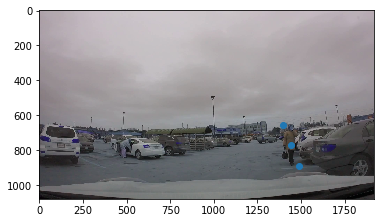

In [11]:
import cv2
import matplotlib.pyplot as plt
im = cv2.imread(data["image"][0][0])
plt.imshow(im)
plt.scatter([1398.0,1486.0, 1442.0], [654.0, 892.0, 773.0])